In [1]:
import sklearn
import sklearn.datasets
import sklearn.ensemble
import numpy as np
import lime
import lime.lime_tabular
import pandas as pd


In [2]:
from __future__ import print_function

## Loading data, training a model

In [3]:
file1 = 'Flight-Level-False-Pos-Data_160920.csv'

df1 = pd.read_csv(file1)
df1 = df1.set_index('p14_event_record')

#df1.head()

In [4]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2396 entries, 40509975 to 41000036
Data columns (total 20 columns):
flight_record                                                                2396 non-null int64
flight_date_exact                                                            2396 non-null object
tail_number                                                                  2396 non-null object
airframe                                                                     2396 non-null object
fleet                                                                        2396 non-null object
takeoff_airport_code                                                         2396 non-null object
landing_airport_code                                                         2396 non-null object
p14_event_type                                                               2396 non-null object
p14_severity                                                                 2396 non-null object
p

## label encoding

### encoding p_14 event type

In [5]:
df1['p14_event_type'].unique()

array(['Airborne Speed High', 'High Vertical Acceleration at landing',
       'Pitch Attitude High During Rotation (Gears Extended)',
       'TCAS Resolution Advisory', 'Rotation Speed High',
       'Climb Speed Low', 'GPWS: Windshear Warning', 'Deep Touchdown',
       'High Speed Below 5000 ft AAL', 'Pitch Rate Low during Rotation',
       'Approach Speed High Below 50 ft AGL (Vref)', 'GPWS: Sink Rate',
       'Late Land Flap Selection', 'MMO Exceedance',
       'Thrust reversers delayed during landing',
       'Speed Brakes Used During Final Approach', 'Climb Speed High',
       'VFE (Flap Airspeed Limit) Exceedance',
       'Below Minimum Maneuver Speed', 'Rotation Speed Low',
       'High Bank Angle Descent Below 200 feet', 'Idle Thrust Approach',
       'Deviation Above GlideSlope 500 to 200 ft AGL',
       'Early Flap Retraction', 'Airspeed Low Relative to Stall Speed',
       'High Bank Angle Climb below 200 feet', 'Short touchdown',
       'Stick shaker', 'GPWS: Pull Up', 'Shor

In [6]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
le.fit(['Airborne Speed High', 'High Vertical Acceleration at landing',
       'Pitch Attitude High During Rotation (Gears Extended)',
       'TCAS Resolution Advisory', 'Rotation Speed High',
       'Climb Speed Low', 'GPWS: Windshear Warning', 'Deep Touchdown',
       'High Speed Below 5000 ft AAL', 'Pitch Rate Low during Rotation',
       'Approach Speed High Below 50 ft AGL (Vref)', 'GPWS: Sink Rate',
       'Late Land Flap Selection', 'MMO Exceedance',
       'Thrust reversers delayed during landing',
       'Speed Brakes Used During Final Approach', 'Climb Speed High',
       'VFE (Flap Airspeed Limit) Exceedance',
       'Below Minimum Maneuver Speed', 'Rotation Speed Low',
       'High Bank Angle Descent Below 200 feet', 'Idle Thrust Approach',
       'Deviation Above GlideSlope 500 to 200 ft AGL',
       'Early Flap Retraction', 'Airspeed Low Relative to Stall Speed',
       'High Bank Angle Climb below 200 feet', 'Short touchdown',
       'Stick shaker', 'GPWS: Pull Up', 'Short Runway Distance Remaining',
       'Pitch Attitude High During Landing (Gears Compressed)',
       'FLCH  mode below 1000 ft HAT', "GPWS: Don't Sink",
       'High Speed Below 3000 ft AAL',
       'High Rate of Descent 1000 ft HAT -> 500 HAT',
       'GPWS: Too Low Terrain', 'GPWS: Too Low Flap',
       'High Bank Angle on Flare', 'GPWS: Glideslope',
       'Altitude Excursion', 'GPWS: Terrain', 'GPWS: Terrain Pull Up',
       'GPWS: Too Low Gear',
       'Deviation Below GlideSlope 500 to 200 ft AGL',
       'High Speed Rejected Takeoff',
       'High Bank Angle Climb 200ft to 1000 ft', 'VMO Exceedance',
       'Landing with incorrect flap', 'GPWS: Look Ahead Caution'])
df1['p14_event_type'] = le.transform(df1['p14_event_type'])

In [7]:
df1['p14_event_type'].value_counts().plot.bar()

### mapping p_14 severity levels

In [8]:
df1['p14_severity'] = df1['p14_severity'].map({'Level 2': 0,
                              'Level 3': 1})

## dropping columns

In [9]:
df1 = df1.drop(columns = ['flight_record'
                          , 'flight_date_exact'
                          , 'tail_number'
                          , 'airframe'
                          , 'fleet'
                          , 'takeoff_airport_code'
                          , 'landing_airport_code'
                          #, 'p14_event_type'
                          , 'p14_false_positive'
                         ])

In [10]:
df1.head()

,p14_event_type,p14_severity,p14_start_of_event_10_seconds_seconds_from_start_of_file,p14_end_of_event_10_seconds_seconds_from_start_of_file,p14_data_dropouts_seconds,p14_error_b_w_gmt_and_recorded_time_around_event_percent,p14_estimated_nav_error_at_start_of_event_nm,p14_standard_deviation_of_sample_rate_of_gmt_event_interval_30_seconds_hz,p14_flap_handle_position_at_start_of_event,p14_speed_brake_handle_position_at_start_of_event_deg,p14_flap_position_at_start_of_event_deg_ted,target
p14_event_record,,,,,,,,,,,,
40509975,0,0,609.00,629.00,0.0,-0.000095,0.024290,0,5.0,0.641989,5.203770,0
40509984,31,0,5611.25,5637.25,2.0,-0.000436,0.038936,0,30.0,4.200743,30.009817,0
40510130,0,0,688.00,708.00,0.0,-0.000095,0.009928,0,10.0,-1.286268,10.302753,0
40510312,37,0,662.00,682.00,0.0,-0.001526,0.032998,0,1.0,-1.194254,1.030449,0
40511060,45,0,10624.00,10663.00,2.0,-0.001691,0.008319,0,5.0,-1.654518,5.180016,0


## setting features and targets

In [11]:
df1.columns.tolist()

['p14_event_type',
 'p14_severity',
 'p14_start_of_event_10_seconds_seconds_from_start_of_file',
 'p14_end_of_event_10_seconds_seconds_from_start_of_file',
 'p14_data_dropouts_seconds',
 'p14_error_b_w_gmt_and_recorded_time_around_event_percent',
 'p14_estimated_nav_error_at_start_of_event_nm',
 'p14_standard_deviation_of_sample_rate_of_gmt_event_interval_30_seconds_hz',
 'p14_flap_handle_position_at_start_of_event',
 'p14_speed_brake_handle_position_at_start_of_event_deg',
 'p14_flap_position_at_start_of_event_deg_ted',
 'target']

In [12]:
features = ['p14_event_type',
 'p14_severity',
 'p14_start_of_event_10_seconds_seconds_from_start_of_file',
 'p14_end_of_event_10_seconds_seconds_from_start_of_file',
 'p14_data_dropouts_seconds',
 'p14_error_b_w_gmt_and_recorded_time_around_event_percent',
 'p14_estimated_nav_error_at_start_of_event_nm',
 'p14_standard_deviation_of_sample_rate_of_gmt_event_interval_30_seconds_hz',
 'p14_flap_handle_position_at_start_of_event',
 'p14_speed_brake_handle_position_at_start_of_event_deg',
 'p14_flap_position_at_start_of_event_deg_ted']

target = 'target'

In [13]:
X = df1[features]
y = df1[target]

## imputing null values

In [14]:
df1.isnull().sum()

p14_event_type                                                               0
p14_severity                                                                 0
p14_start_of_event_10_seconds_seconds_from_start_of_file                     1
p14_end_of_event_10_seconds_seconds_from_start_of_file                       1
p14_data_dropouts_seconds                                                    4
p14_error_b_w_gmt_and_recorded_time_around_event_percent                     1
p14_estimated_nav_error_at_start_of_event_nm                                 1
p14_standard_deviation_of_sample_rate_of_gmt_event_interval_30_seconds_hz    0
p14_flap_handle_position_at_start_of_event                                   1
p14_speed_brake_handle_position_at_start_of_event_deg                        1
p14_flap_position_at_start_of_event_deg_ted                                  1
target                                                                       0
dtype: int64

In [15]:
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer

X = StandardScaler().fit(X).transform(X)
X = SimpleImputer(missing_values=np.nan, strategy='most_frequent').fit(X).transform(X)

In [16]:
df1.isnull().sum()

p14_event_type                                                               0
p14_severity                                                                 0
p14_start_of_event_10_seconds_seconds_from_start_of_file                     1
p14_end_of_event_10_seconds_seconds_from_start_of_file                       1
p14_data_dropouts_seconds                                                    4
p14_error_b_w_gmt_and_recorded_time_around_event_percent                     1
p14_estimated_nav_error_at_start_of_event_nm                                 1
p14_standard_deviation_of_sample_rate_of_gmt_event_interval_30_seconds_hz    0
p14_flap_handle_position_at_start_of_event                                   1
p14_speed_brake_handle_position_at_start_of_event_deg                        1
p14_flap_position_at_start_of_event_deg_ted                                  1
target                                                                       0
dtype: int64

## train test split

In [17]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

## Resampling

In [18]:
from imblearn.over_sampling import SMOTE

smote = SMOTE()
X_sm, y_sm = smote.fit_sample(X_train, y_train)

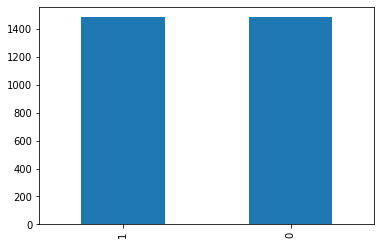

In [19]:
y_sm.value_counts().plot.bar()

## modelling

In [20]:
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier()

In [21]:
clf.fit(X_sm, y_sm)

RandomForestClassifier()

In [22]:
from pprint import pprint
# Look at parameters used by our current forest
print('Parameters currently in use:\n')
pprint(clf.get_params())

Parameters currently in use:

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}


## Evaluation

In [23]:
#from sklearn.metrics import accuracy_score
#accuracy_score(y_test, clf.predict(X_test))

In [24]:
actual = y_test

prob_1 = clf.predict_proba(X_test)[:,1]

evaluate = pd.DataFrame({"actual": actual
                        , "prob_1": prob_1
                        })
threshold = 0.5

evaluate["predictions"] = (evaluate["prob_1"] > threshold) *1

print((evaluate["actual"]==evaluate["predictions"]).mean())
evaluate

0.9735744089012517


,actual,prob_1,predictions
p14_event_record,,,
40574590,0,0.00,0
40538350,0,0.00,0
40752318,0,0.00,0
40810629,0,0.07,0
40777536,0,0.02,0
...,...,...,...
40522896,0,0.00,0
40926733,0,0.01,0
40516703,0,0.00,0


In [25]:
#evaluate.head()

In [26]:
#evaluate.to_csv('evaluation.csv', index = True, header=True)

### probability/ distribution plot

[]

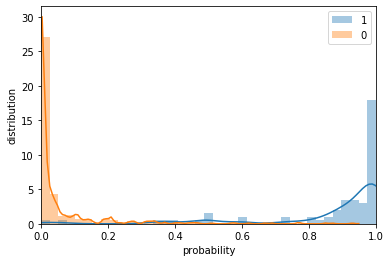

In [27]:
import seaborn as sns
import matplotlib.pyplot as plt

x = evaluate[evaluate['actual']==1].prob_1
y = evaluate[evaluate['actual']==0].prob_1

bins = np.linspace(0,1,40)

sns.distplot(x, bins=bins, label='1')
sns.distplot(y, bins=bins, label='0')
plt.xlim(0,1)
plt.xlabel('probability')
plt.ylabel('distribution')
plt.legend()
plt.plot()

### Classification report

In [28]:
from sklearn.metrics import classification_report

# Predict the labels of the test set
y_pred = clf.predict(X_test)

# Compute metrics
print(classification_report(y_test, y_pred))
#print("Accuracy: {}".format(cv.score(X_test, y_test)))

              precision    recall  f1-score   support

           0       0.99      0.98      0.99       641
           1       0.86      0.90      0.88        78

    accuracy                           0.97       719
   macro avg       0.93      0.94      0.93       719
weighted avg       0.97      0.97      0.97       719



**interpretaion**
- Recall – What percent of the positive cases did you catch? 
- Precision – What percent of your predictions were correct?
- F1 score – What percent of positive predictions were correct? 
    - the harmonic mean between precision & recall
- The support is the number of occurence of the given class in your dataset

### confusion matrix

cm = pd.crosstab(
    evaluate["actual"]
    , evaluate["predictions"]
    , rownames = ["Actual"]
    , colnames = ["Prediction"]
    , margins = True
)
cm

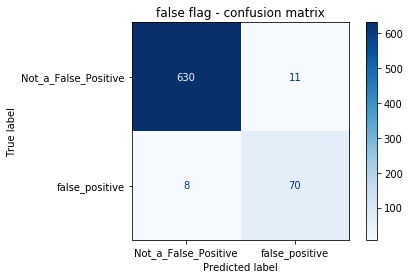

In [29]:
from sklearn.metrics import plot_confusion_matrix

disp = plot_confusion_matrix(clf, X_test,y_test, cmap=plt.cm.Blues,display_labels=dict(Not_a_False_Positive=0,false_positive=1))
disp.ax_.set_title("false flag - confusion matrix")
plt.show()

### ROC curve

In [31]:
# Import necessary modules
from sklearn.metrics import auc, roc_curve

false_positive_rate, true_positive_rate, thresholds = roc_curve(evaluate["actual"] , evaluate["predictions"])
roc_auc = auc(false_positive_rate, true_positive_rate)
print (roc_auc)

0.9401376055042201


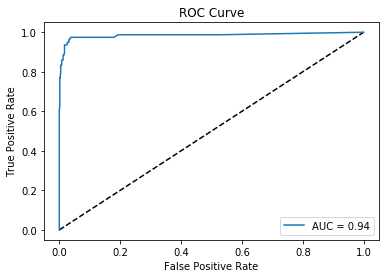

In [32]:
# Compute predicted probabilities: y_pred_prob
y_pred_prob = clf.predict_proba(X_test)[:,1]

# Generate ROC curve values: fpr, tpr, thresholds
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)

# Plot ROC curve
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr, tpr, label='AUC = %0.2f'% roc_auc)
plt.legend(loc='lower right')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.show()

## feature importance

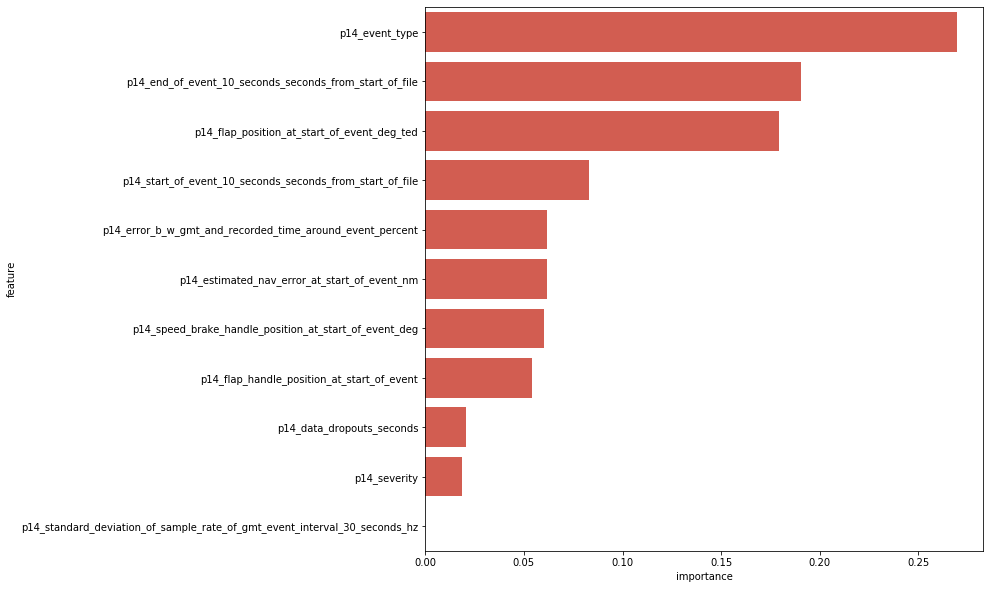

,feature,importance,cum_sum
0,p14_event_type,0.269505,0.269505
1,p14_end_of_event_10_seconds_seconds_from_start...,0.190552,0.460057
2,p14_flap_position_at_start_of_event_deg_ted,0.179592,0.639649
3,p14_start_of_event_10_seconds_seconds_from_sta...,0.083005,0.722654
4,p14_error_b_w_gmt_and_recorded_time_around_eve...,0.061821,0.784475
5,p14_estimated_nav_error_at_start_of_event_nm,0.061816,0.846292
6,p14_speed_brake_handle_position_at_start_of_ev...,0.060215,0.906506
7,p14_flap_handle_position_at_start_of_event,0.054267,0.960773
8,p14_data_dropouts_seconds,0.020726,0.981499
9,p14_severity,0.018501,1.000000


Original number of columns: 11


In [33]:
n_records = 15

importances = pd.DataFrame({
    "feature": features,
    "importance": clf.feature_importances_
})
importances = importances.sort_values("importance", ascending=False).reset_index(drop=True)
importances["cum_sum"] = np.cumsum(importances.importance)

fig, ax = plt.subplots(figsize=(10, 10))

sns.barplot(importances[:n_records].importance, importances[:n_records].feature, color='#E74C3C')

plt.show()

display(importances[:n_records])
print(f"Original number of columns: {len(features)}")

## Create the explainer

In [34]:
explainer = lime.lime_tabular.LimeTabularExplainer(X_train
                                                   , feature_names= features
                                                   , class_names= target
                                                   , mode='regression'
                                                   , discretize_continuous=True
                                                   )

In [68]:
#np.random.seed(1)
#i = np.random.randint(0, X_test.shape[1])
exp = explainer.explain_instance(X_test[0], clf.predict_proba, num_features=7)
#exp.show_in_notebook(show_table=True, show_all=False)

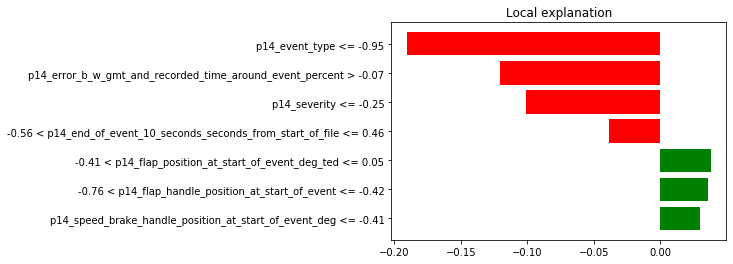

In [69]:
exp.as_pyplot_figure()
plt.show()

In [70]:
pd.DataFrame(exp.as_list(label=1), columns=['Feature', 'Value'])


,Feature,Value
0,p14_event_type <= -0.95,-0.190666
1,p14_error_b_w_gmt_and_recorded_time_around_eve...,-0.120441
2,p14_severity <= -0.25,-0.100680
3,-0.56 < p14_end_of_event_10_seconds_seconds_fr...,-0.038673
4,-0.41 < p14_flap_position_at_start_of_event_de...,0.038161
5,-0.76 < p14_flap_handle_position_at_start_of_e...,0.035805
6,p14_speed_brake_handle_position_at_start_of_ev...,0.029678
